In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from decision_tree_class import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree

In [51]:
df = pd.read_csv("processed.cleveland.data",sep=',')
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df.columns = column_names

df_no_missing = df.loc[(df['ca']!='?') & (df['thal']!='?')]

X = df_no_missing.drop('num',axis=1).copy()
y = df_no_missing['num'].copy()
y = y.apply(lambda x: 1 if x > 0 else 0)

X_encoded = pd.get_dummies(X,columns=['sex','cp','fbs','restecg','exang','slope','thal']).astype(float)
X_encoded.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,160.0,286.0,108.0,1.5,3.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,67.0,120.0,229.0,129.0,2.6,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,37.0,130.0,250.0,187.0,3.5,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,41.0,130.0,204.0,172.0,1.4,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,56.0,120.0,236.0,178.0,0.8,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [52]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)
dt = DecisionTreeClassifier(minimum_samples_split=2,max_depth=2)
dt.fit(pd.concat((X_train,y_train),axis=1))
dt.print_tree()

x_11  <=  0.0 ?
left:
x_20  <=  0.0 ?
left:
x_1  <=  178.0 ?
left:
0
right:
1
right:
x_6  <=  0.0 ?
left:
1
right:
0
right:
x_5  <=  0.0 ?
left:
x_17  <=  0.0 ?
left:
1
right:
0
right:
x_4  <=  0.3 ?
left:
1
right:
1


My-DecisionTreeClassifier


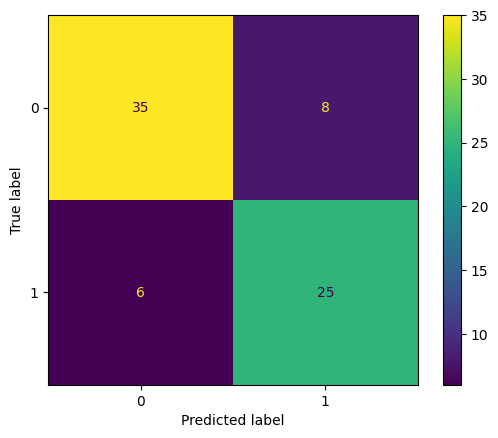

Precision: 0.7576
Accuracy: 0.8108
Sensitivity (Recall): 0.8065


In [53]:
from matplotlib import pyplot as plt
def plot_confusion_mat(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    # Calculate precision, accuracy, and sensitivity
    precision = precision_score(y_test1, predictions)
    accuracy = accuracy_score(y_test1, predictions)
    sensitivity = recall_score(y_test1, predictions)

    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (Recall): {sensitivity:.4f}')
print("My-DecisionTreeClassifier")
plot_confusion_mat(dt,X_test,y_test)

sklearn-DecisionTreeClassifier


[Text(0.5, 0.8333333333333334, 'x[11] <= 0.5\ngini = 0.499\nsamples = 222\nvalue = [116, 106]'),
 Text(0.25, 0.5, 'x[20] <= 0.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.198\nsamples = 72\nvalue = [64, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.493\nsamples = 41\nvalue = [23.0, 18.0]'),
 Text(0.75, 0.5, 'x[5] <= 0.5\ngini = 0.391\nsamples = 109\nvalue = [29, 80]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.5\nsamples = 47\nvalue = [24.0, 23.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.148\nsamples = 62\nvalue = [5, 57]')]

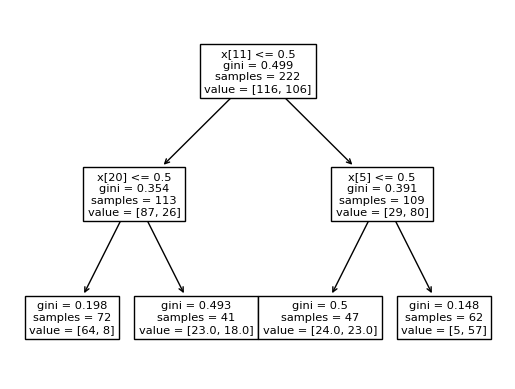

In [58]:
from sklearn.preprocessing import StandardScaler
print("sklearn-DecisionTreeClassifier")

dt2 = tree.DecisionTreeClassifier(max_depth=2,min_samples_split=2,random_state=0)
scaler = StandardScaler()
dt2.fit(X_train,y_train)
tree.plot_tree(dt2)